In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Premier essai

In [81]:
essais = pd.read_csv('C:/Users/Medenou Gabriel/.jupyter/Sans titre', sep=';')
essais['moyenne']= essais[["t1(1/100 s)", "t2(1/100 s)", "t3(1/100 s)"]].mean(axis = 1)
essais

,wl,t1(1/100 s),t2(1/100 s),t3(1/100 s),mention,moyenne
0,43,740,780,779,B,766.333333
1,85,730,798,724,Ma,750.666667
2,72,755,683,983,Ma,807.000000
3,61,990,976,963,B,976.333333
4,37,771,763,775,B,769.666667
5,68,782,1010,685,Ma,825.666667
6,41,715,731,626,B,690.666667
7,8,334,356,352,B,347.333333
8,63,940,939,994,Mo,957.666667
9,12,478,498,502,B,492.666667


In [126]:
X = essais['wl']
Y = essais["t1(1/100 s)"]

In [127]:
p= 0
def pol(t):
    mymodel = np.poly1d(np.polyfit(essais['wl'], essais['moyenne'], t))
    myline = np.linspace(1, 110, 100)
    #plt.scatter(essais['wl'], essais['moyenne'], c='black')
    #plt.plot(myline, mymodel(myline))
    y_true = essais['moyenne']
    y_pred = mymodel(essais['wl'])
    global_p =np.polyfit(essais['wl'], essais['moyenne'], t)
    return r2_score(y_true, y_pred), p


In [128]:
score=[pol(i) for i in range(15)]
degree=[i for i in range(15)]

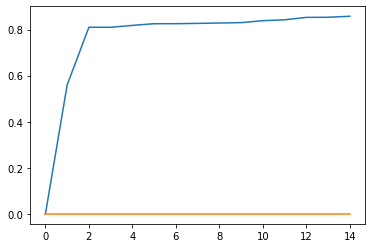

In [129]:
plt.plot(degree, score)

array([143.91108976, -14.66277883])

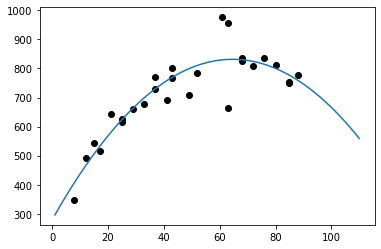

In [130]:
mymodel = np.poly1d(np.polyfit(essais['wl'], essais['moyenne'], 2))
myline = np.linspace(1, 110, 100)
plt.scatter(essais['wl'], essais['moyenne'], c='black')
plt.plot(myline, mymodel(myline))
y_true = essais['moyenne']
y_pred = mymodel(essais['wl'])
p =np.polyfit(essais['wl'], essais['moyenne'], 2)
np.roots(p)

In [131]:
p1 = np.poly1d(p)
q = p1.deriv()
r = np.roots(q)
x0, t = 0.4, 0.9
for i in range(10000):
    x0 = x0+t*q(x0)

print('maximum', x0)
print('sa_derive', q(x0))

maximum 64.6241554658429
sa_derive 7.105427357601002e-15


# Deuxième essai

In [132]:
essais2 = pd.read_csv('C:/Users/Medenou Gabriel/.jupyter/Classeur2.csv', sep=';')
essais2['moyenne']= essais2[["T1", "T2", "T3"]].mean(axis = 1)
essais2

,Wl,Ww,T1,T2,T3,Performance,moyenne
0,33.55,69.81,1030,841,827,B,899.333333
1,65.32,30.53,705,817,778,Ma,766.666667
2,40.75,64.64,813,698,630,Mo,713.666667
3,50.39,68.77,843,775,757,Mo,791.666667
4,53.77,42.01,777,775,849,B,800.333333
5,56.81,64.91,783,736,738,Mo,752.333333
6,56.85,27.30,95,947,976,B,672.666667
7,43.09,79.43,709,743,703,B,718.333333
8,21.60,28.67,524,523,514,B,520.333333
9,44.79,47.04,780,900,858,Mo,846.000000


In [134]:
from mpl_toolkits.mplot3d import Axes3D

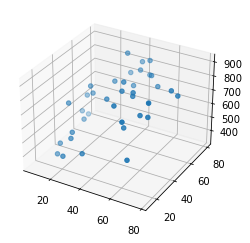

In [135]:
ax = plt.axes(projection = '3d')
ax.scatter(essais2["Wl"], essais2['Ww'], essais2['moyenne'])

In [137]:
X= essais2[["Wl", "Ww"]]
y= essais2["moyenne"]
x= np.linspace(1, 100, 1000)

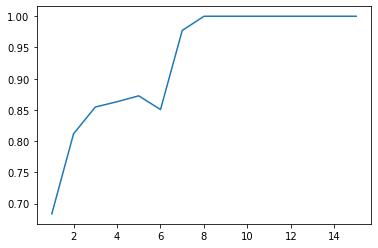

In [138]:
def RegPoly(base1, base2):
    scores = []
    for i in range(1, 16):
        polynomial_features = PolynomialFeatures(degree=i)
        x_poly= polynomial_features.fit_transform(base1)
        model = LinearRegression()
        c = model.fit(x_poly, base2)
        y_poly_pred = model.predict(x_poly)
        #print("score =", model.score(x_poly, y))
        scores.append(model.score(x_poly, base2))
    deg = [i for i in range(1, 16)]    
    plt.plot(deg, scores)
RegPoly(X, y)

In [139]:
polynomial_features = PolynomialFeatures(degree=5)
x_poly= polynomial_features.fit_transform(X)
model = LinearRegression()
c = model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
print("score =", model.score(x_poly, y))

score = 0.8725002736354148


# Optimization_essai2

In [140]:
from scipy.optimize import minimize 

In [141]:
def f(x):
    return -model.predict(polynomial_features.fit_transform([[x[0], x[1]]]))

bnds = [(50, 80), (30, 75)] 
min1 = minimize(f, (0, 0), method= 'SLSQP', bounds =bnds)  
min1

     fun: array([-805.45854356])
     jac: array([0.        , 0.00036621])
 message: 'Optimization terminated successfully'
    nfev: 24
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([51.52887444, 38.55056327])

#                                        Troisième essai

In [142]:
essai3 = pd.read_csv('C:/Users/Medenou Gabriel/Desktop/projet_EEIA/Data_4D.csv', sep=';')
essai3

,Wl,Tl,Angle,w,Temps
0,33.83,53.25,17.68,46.87,5.730
1,41.72,57.96,15.47,47.87,5.320
2,43.66,69.77,23.15,36.22,7.100
3,53.14,64.36,12.27,43.83,7.330
4,17.00,65.00,10.00,30.90,5.845
5,71.08,63.57,3.69,48.99,7.910
6,71.01,63.81,-9.30,36.86,6.325
7,67.82,74.52,-16.61,29.76,7.995
8,41.53,65.77,8.74,43.76,7.300
9,59.86,64.30,-1.58,26.56,4.845


In [143]:
X3 = essai3[["Wl", "Tl",'Angle', "w" ]]
y3 = essai3["Temps"]

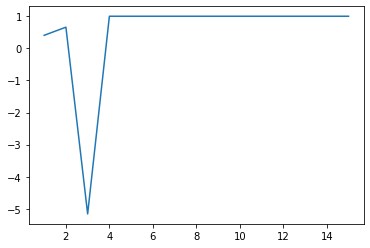

In [144]:
RegPoly(X3, y3)

In [145]:
polynomial_features = PolynomialFeatures(degree=2)
x_poly= polynomial_features.fit_transform(X3)
model = LinearRegression()
c = model.fit(x_poly, y3)
y_poly_pred = model.predict(x_poly)
print("score =", model.score(x_poly, y3))

score = 0.6592316800201492


In [147]:
def g(x):
    return -model.predict(polynomial_features.fit_transform([[x[0], x[1], x[2], x[3]]]))
g([1, 2, 3, 4])
#bnds = [(50, 80), (30, 75), (-25, 25), (20, 50)] 
min1 = minimize(g, (0, 0, 0 , 0), method= 'SLSQP', bounds =[(50, 80), (30, 75), (-25, 25), (20, 50)] )  
min1

     fun: array([-8.67446444])
     jac: array([ 0.15906334,  0.08750677, -0.00166416,  0.05304122])
 message: 'Optimization terminated successfully'
    nfev: 30
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([50., 30., 25., 20.])